## Two Body orbiting problem
In two dimensional space, we can write the equations of motion between N bodies as:

$$\frac{d \vec{r_1}}{dt} = \vec{v_i}$$


$$\frac{d \vec{v_i}}{dt}=\sum_{j=1}^N \frac{Gm_j}{r^3}(\vec{r_j}-\vec{r_i})$$

Where r is the distance between the bodies:
$r=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$



### Differential Equations
Decomposing these to a 2 body system we can write the following equations

$$\frac{d x_1}{dt}=v_{x_1}$$


$$\frac{d v_{x_1}}{dt}=-\frac{Gm_1}{r^3}(x_2-x_1)$$


$$\frac{d y_1}{dt}=v_{y_1}$$


$$\frac{d v_{y_1}}{dt}=-\frac{Gm_1}{r^3}(y_2-y_1) $$


$$\frac{d x_2}{dt}=v_{x_2}$$


$$\frac{d v_{x_2}}{dt}=-\frac{Gm_2}{r^3}(x_1-x_2)$$


$$\frac{d y_2}{dt}=v_{y_2}$$


$$\frac{d v_{y_2}}{dt}=-\frac{Gm_2}{r^3}(y_1-y_2) $$






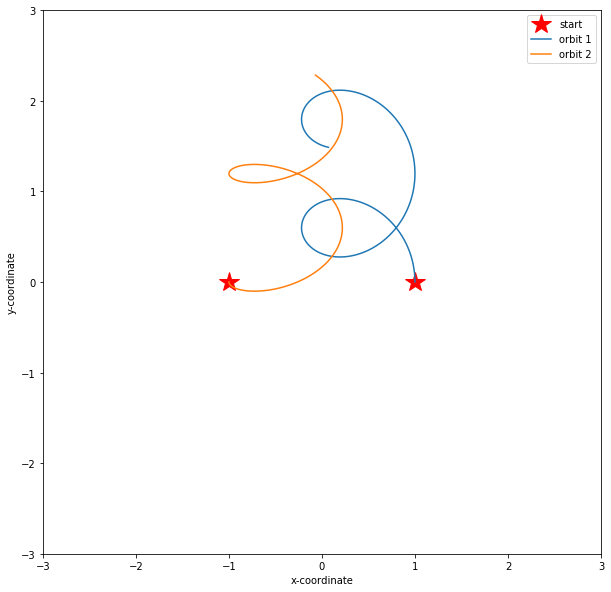

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

G=1.
m1=1
m2=1
tend=3*np.pi

h=0.001
y=[1.,0.,0.,.5, -1.,0.,0.,-.1]
t=0
fig = plt.figure(figsize=(10,10))
plt.axes(xlim=(-3, 3), ylim=(-3, 3))
plt.plot(y[0],y[2],"*",c="red",markersize="20", label="start")
plt.plot(y[4],y[6],"*",c="red",markersize="20")


def f(t, y):
    f=np.zeros(8)
    r=np.sqrt( (y[0]-y[4])**2 + (y[2]-y[6])**2 )

    f[0]=y[1]
    f[1]=G*m1/r/r/r*(y[4]-y[0])
    f[2]=y[3]
    f[3]=G*m1/r/r/r*(y[6]-y[2])

    f[4]=y[5]
    f[5]=G*m2/r/r/r*(y[0]-y[4])
    f[6]=y[7]
    f[7]=G*m2/r/r/r*(y[2]-y[6])
    
    
    
    
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2) 
    k4=h*f(t+h,y+k3) 
    y+= (k1+2*k2+2*k3+k4)/6
    return y

xp1=[]
yp1=[]
xp2=[]
yp2=[]

while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,8)
    xp1=np.append(xp1,y[0])
    yp1=np.append(yp1,y[2])
    xp2=np.append(xp2,y[4])
    yp2=np.append(yp2,y[6])
    t = t+h
    
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.plot(xp1,yp1,label="orbit 1")
plt.plot(xp2,yp2,label="orbit 2")

plt.legend(loc="upper right")
plt.show()

### Center of Mass & Polar Implementation
#### Center of Mass:
Since there is no external forces on our objects, the center of mass of the system should not accelerate. In other words, the center of mass of the system should stay at rest or move with a constant velocity.

$$ \vec{r_{cm}} = \frac{m_1 \vec{r_1}+m_2 \vec{r_2}}{m_1+m_2}$$

$$ \vec{v_{cm}} = \frac{m_1 \vec{v_1}+m_2 \vec{v_2}}{m_1+m_2}$$

with $q=\frac{m_1}{m_2}$, if object one has $\vec{r_1} = \vec{r_0}$ and $\vec{v_1} = \vec{v_0}$, for the objects center of mass to maintain its equilibrium condition, we will have $\vec{r_2} = -q\vec{r_0}$
$\vec{v_2} = -q\vec{v_0}$


#### Polar:
To define an eccentricity to the orbit we can implement, where $a$ is the semi-major axis
$$ \vec{r_{0}} = \frac{1-e}{1+q} a$$


$$ \vec{v_{0}} = \frac{1}{1+q}\sqrt{\frac{1+e}{1-e}} \sqrt{\frac{G(m_1+m_2)}{a}}$$

Eccentricity=  0.5


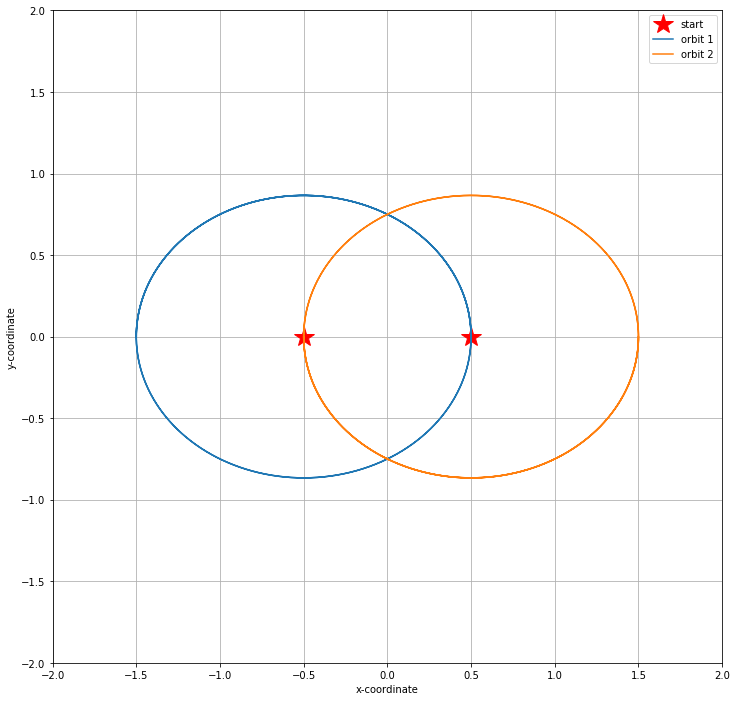

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

G=1
m1=1
m2=1
q = m1/m2
e=.5
a=2
r0 = (1-e)/(1+q)*a
v0 = 1/(1+q)*np.sqrt((1+e)/(1-e))*np.sqrt(G*(m1+m2)/a)
tend=2*np.pi*5
h=0.001
y=[r0,0.,0.,v0, -q*r0,0.,0.,-q*v0]
t=0

print("Eccentricity= ", e)

fig = plt.figure(figsize=(12,12))
plt.axes(xlim=(-2, 2), ylim=(-2, 2))
plt.plot(y[0],y[2],"*",c="red",markersize="20", label="start")
plt.plot(y[4],y[6],"*",c="red",markersize="20")


def f(t, y):
    f=np.zeros(8)
    r=np.sqrt( (y[0]-y[4])**2 + (y[2]-y[6])**2 )
    #print(r)
    f[0]=y[1]
    f[1]=G*m1/r/r/r*(y[4]-y[0])
    f[2]=y[3]
    f[3]=G*m1/r/r/r*(y[6]-y[2])
    
    f[4]=y[5]
    f[5]=G*m2/r/r/r*(y[0]-y[4])
    f[6]=y[7]
    f[7]=G*m2/r/r/r*(y[2]-y[6])
    
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+= (k1+2*k2+2*k3+k4)/6 
    return y

xp1=[]
yp1=[]
xp2=[]
yp2=[]

while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,8)
    xp1=np.append(xp1,y[0])
    yp1=np.append(yp1,y[2])
    xp2=np.append(xp2,y[4])
    yp2=np.append(yp2,y[6])
    t = t+h

plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.plot(xp1,yp1,label="orbit 1")
plt.plot(xp2,yp2,label="orbit 2")
plt.grid()
plt.legend(loc="upper right")
plt.show()

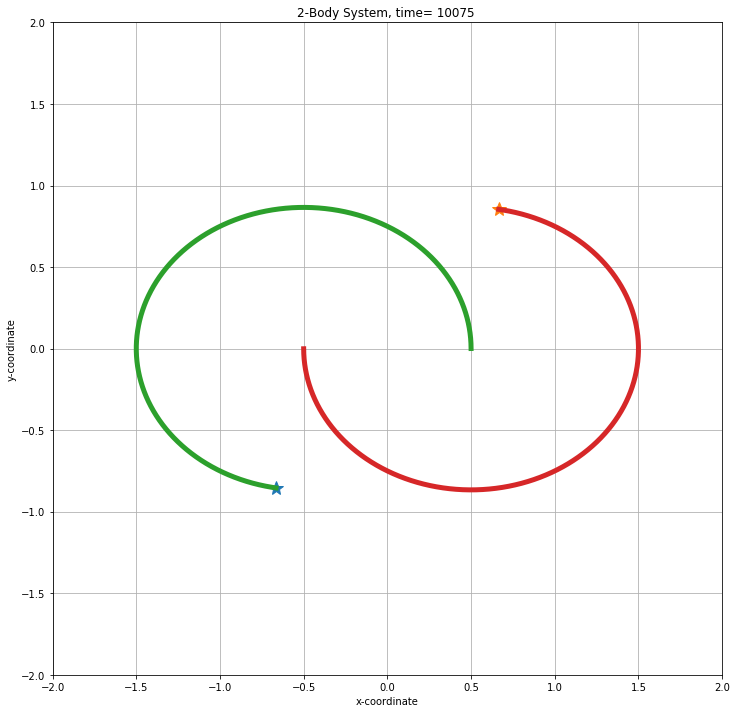

--- 607.7023227214813 seconds ---


In [98]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import time
start_time = time.time()

fig = plt.figure(figsize=(12,12))
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
G=1.
m1=1
m2=1
q = m1/m2
e=.5
a=2


r0 = (1-e)/(1+q)*a
v0 = 1/(1+q)*np.sqrt((1+e)/(1-e))*np.sqrt(G*(m1+m2)/a)

tend= 4*np.pi
y=[r0,0.,0.,v0, -q*r0,0.,0.,-q*v0]
line1, = plt.plot(y[0],y[2],"*",markersize="15")
line2, = plt.plot(y[4],y[6],"*",markersize="15")

line3, = plt.plot([],[],lw="5")
line4, = plt.plot([],[],lw="5")

h=0.001

xp1=[]
yp1=[]
xp2=[]
yp2=[]


# initialization function: plot the background of each frame
def init():
    line1.set_data(y[0], y[2])
    line2.set_data(y[4], y[6])
    
    
    return line1, line2, line3, line4,


def animate(i):
    global y
    plt.grid()
    i=i/1000
    y = rk4(i,h,y,8)
    line1.set_data(y[0], y[2])
    line2.set_data(y[4], y[6])


    xp1.append(y[0])
    yp1.append(y[2])
    xp2.append(y[4])
    yp2.append(y[6])

    i=i*1000
    line3.set_data(xp1[:int(i)], yp1[:int(i)])
    line4.set_data(xp2[:int(i)], yp2[:int(i)])
    
    ax.set_xlabel('x-Coordinate')
    ax.set_ylabel('y-Coordinate')
    if i%5==0:
        ax.set_title("2-Body System, time= %d " % i)


    return line1, line2, line3, line4, 


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(2*tend/np.pi*1260), interval=10, blit=True)
anim.save('Two Body Orbit1.mp4', fps=60
          #, extra_args=['-vcodec', 'libx264']
         )
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.grid()
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

In [99]:
from IPython.display import display, HTML
HTML('''<div>
    <img src="Two Body Orbit.mp4">
    
</div>''')

### Credits:
help was used from: https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/ast119_w15/class-11